# Accessing info with `qiskit-superstaq`
This tutorial will cover the information you can access on your account and related jobs and backends using `qiskit-superstaq`.

## Imports and API Token

As usual, we'll begin with importing requirements and setting up access to Superstaq. This tutorial uses `qiskit-superstaq`, our Superstaq client for Qiskit. You can install it and relevant dependencies by running `pip install qiskit-superstaq[examples]`.

In [1]:
# Requirements to use qiskit-superstaq
try:
    import qiskit
    import qiskit_superstaq as qss
except ImportError:
    print("Installing qiskit-superstaq...")
    %pip install --quiet 'qiskit-superstaq[examples]'
    print("Installed qiskit-superstaq.")
    print("You may need to restart the kernel to import newly installed packages.")
    import qiskit
    import qiskit_superstaq as qss

Now, we instantiate a provider in `qiskit-superstaq` with `SuperstaqProvider()`. Supply the Superstaq API token by providing the token as an argument of `qss.SuperstaqProvider()` or setting it as an environment variable (see [this guide](https://superstaq.readthedocs.io/en/latest/get_started/basics/basics_qss.html#Set-up-access-to-Superstaq%E2%80%99s-API)).

In [2]:
provider = qss.SuperstaqProvider()

## Account Information

The `provider` class gives you a means to retrieve information regarding your Superstaq account. Currently, you can use `provider` to retrieve your Superstaq balance.

In [3]:
provider.get_balance()

'$48.35'

If are interested in increasing your balance or have more information on your user role, please reach out to us at superstaq@infleqtion.com or join our [Slack workspace](https://join.slack.com/t/superstaq/shared_invite/zt-1wr6eok5j-fMwB7dPEWGG~5S474xGhxw).

## Backend Information
In addition to account information, the`SuperstaqProvider` object also gives you a list of all the devices and simulators to which you have access, as well as additional information about those backends.

* `backends()`: Retrieves a list of available backends
* `get_backend("<backend_name>")`: Select your target backend, where `<backend_name>` is the name of the desired backend
* `get_backend("<backend_name>").target_info()`: Retrieve information on your selected backend, such as number of qubits, native gate set

In [4]:
provider.backends()

[<SuperstaqBackend('aws_dm1_simulator')>,
 <SuperstaqBackend('aws_sv1_simulator')>,
 <SuperstaqBackend('aws_tn1_simulator')>,
 <SuperstaqBackend('ibmq_belem_qpu')>,
 <SuperstaqBackend('ibmq_extended-stabilizer_simulator')>,
 <SuperstaqBackend('ibmq_guadalupe_qpu')>,
 <SuperstaqBackend('ibmq_jakarta_qpu')>,
 <SuperstaqBackend('ibmq_lagos_qpu')>,
 <SuperstaqBackend('ibmq_lima_qpu')>,
 <SuperstaqBackend('ibmq_manila_qpu')>,
 <SuperstaqBackend('ibmq_mps_simulator')>,
 <SuperstaqBackend('ibmq_nairobi_qpu')>,
 <SuperstaqBackend('ibmq_perth_qpu')>,
 <SuperstaqBackend('ibmq_qasm_simulator')>,
 <SuperstaqBackend('ibmq_quito_qpu')>,
 <SuperstaqBackend('ibmq_stabilizer_simulator')>,
 <SuperstaqBackend('ibmq_statevector_simulator')>,
 <SuperstaqBackend('ionq_aria-2_qpu')>,
 <SuperstaqBackend('ionq_harmony_qpu')>,
 <SuperstaqBackend('ionq.simulator')>,
 <SuperstaqBackend('ss_unconstrained_simulator')>]

In [5]:
backend = provider.get_backend("ibmq_lagos_qpu")  # selecting the IBM Lagos device
backend.target_info()

{'backend_name': 'ibmq_lagos_qpu',
 'backend_version': 'n/a',
 'n_qubits': 7,
 'basis_gates': ['cx', 'id', 'rz', 'sx', 'x'],
 'gates': [],
 'local': False,
 'simulator': False,
 'conditional': False,
 'open_pulse': True,
 'memory': False,
 'max_shots': 100000,
 'coupling_map': [[0, 1],
  [1, 0],
  [1, 2],
  [1, 3],
  [2, 1],
  [3, 1],
  [3, 5],
  [4, 5],
  [5, 3],
  [5, 4],
  [5, 6],
  [6, 5]],
 'supports_midcircuit_measurement': True,
 'max_experiments': 900,
 'processor_type': {'family': 'Falcon', 'revision': '5.11', 'segment': 'H'}}

## Job Information
Jobs submitted through Superstaq contain the following information:

* `job_id()`: Unique identifier for the job
* `status()`: Status of the job (either Queued, Running, Done)
* `backend()`: Device the job was run on
* `result().get_counts()`: Counts from the result of the job run
* `input_circuits()`: Retrieves original (i.e., not compiled) circuit for job. Note this returns a list and you must specify the index if you want to retrieve a single circuit.
* `compiled_circuits()`: Retrieves compiled circuit from submitted job. Note this returns a list and you must specify the index if you want to retrieve a single circuit.

Note that jobs live in our database for a limited amount of time. Typically, they have a lifespan of 1 year.

In [6]:
# Creating a circuit using Qiskit
qc = qiskit.QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# Submitting the circuit to the IBM Q QASM Simulator
backend = provider.get_backend("ibmq_qasm_simulator")
job = backend.run(
    qc, method="dry-run", shots=100
)  # Specify "dry-run" as the method to submit & run a Superstaq simulation

In [7]:
job.job_id()

'29235c75-df42-474b-b2d1-fcd2e5772518'

In [8]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [9]:
job.backend()

<SuperstaqBackend('ibmq_qasm_simulator')>

In [10]:
job.result().get_counts()

{'00': 44, '11': 56}

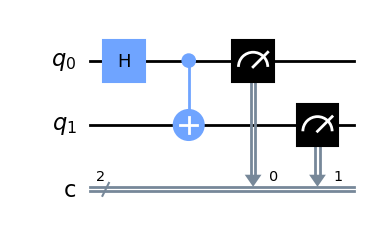

In [11]:
job.input_circuits()[0].draw(output="mpl")

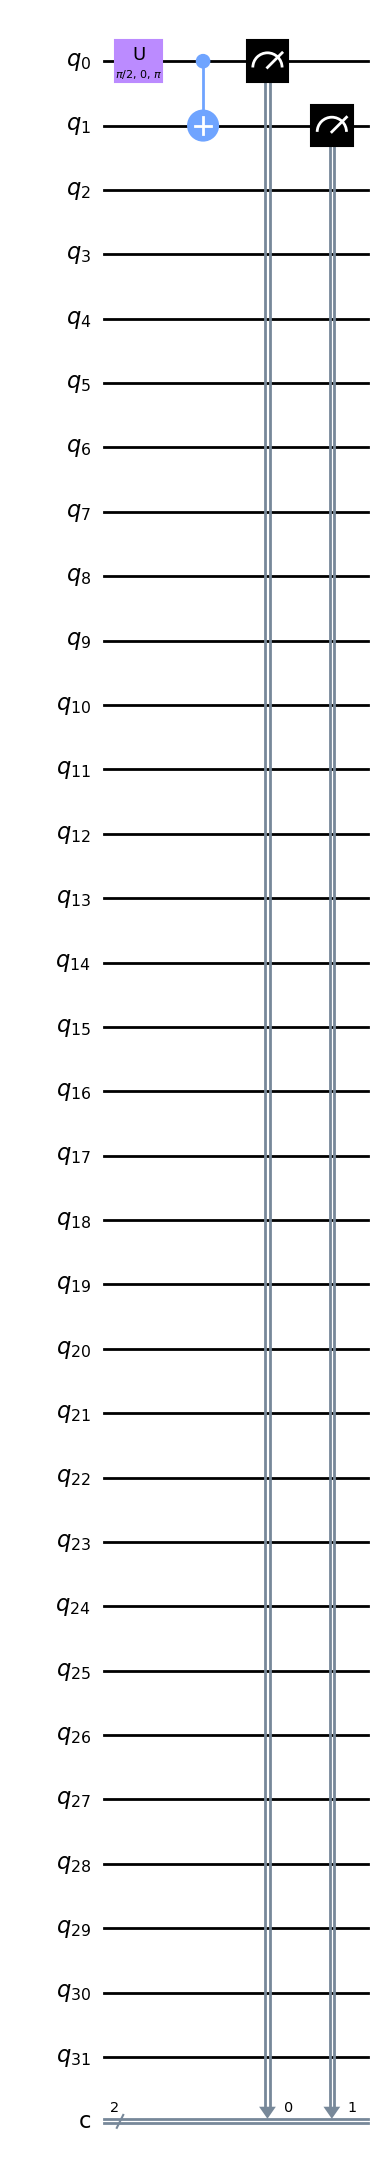

In [12]:
job.compiled_circuits()[0].draw(output="mpl")

You may also retrieve the information described above on a previously submitted `qiskit-superstaq` job:

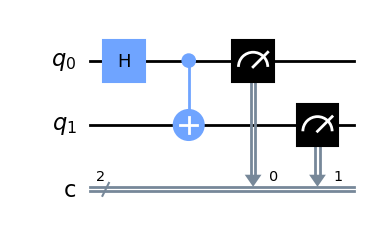

In [13]:
backend = provider.get_backend("ibmq_qasm_simulator")
job_id = job.job_id() # Here we use the job ID from above, but this can be any old job ID
job_old = backend.retrieve_job(job_id)
job_old.input_circuits()[0].draw(output="mpl")